In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''Constants for anamolies'''
mutation_threshold = 0.05

In [3]:
data = pd.read_csv("GenDataset.csv")
sequences = data["Sequence"]
accessions = data["Accession"]

print(accessions + ":" + sequences)

0     MT467263:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
1     MT467262:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
2     MT467261:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
3     MT467260:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
4     MT467259:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
5     MT467258:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
6     MT467257:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
7     MT467256:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
8     MT467255:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
9     MT467254:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
10    MT467253:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
11    MT467252:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
12    MT467251:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
13    MT467250:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
14    MT467249:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
15    MT467248:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
16    MT467247:TCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...
17    MT467246:TCGATCTCTTGTAGATCTGTTCTCTAAACGAAC

In [4]:
colors = {"A": "red", "C": "blue", "G": "green", "T": "purple"}

In [5]:
def nucleotide_counts(sequence):
    nucleotide_count = {"A": 0, "C": 0, "G": 0, "T": 0}
    for nucleotide in sequence:
        if nucleotide in nucleotide_count:
            nucleotide_count[nucleotide] += 1
    return nucleotide_count

In [6]:
def plot_nucleotide_counts(accession, nucleotide_counts):
    labels = nucleotide_counts.keys()
    sizes = nucleotide_counts.values()
    total = sum(sizes)
    percentages = [100 * size / total for size in sizes]
    x = np.arange(len(labels))
    colors_list = [colors[label] for label in labels]
    plt.bar(x, sizes, width=0.5, color=colors_list)
    plt.xticks(x, labels)
    for i, size in enumerate(sizes):
        plt.text(x[i], size + 0.5, f"{size:,d} ({percentages[i]:.1f}%)", ha='center')
    plt.title(f"Composition of Genetic Sequence {accession}")
    plt.show()
    

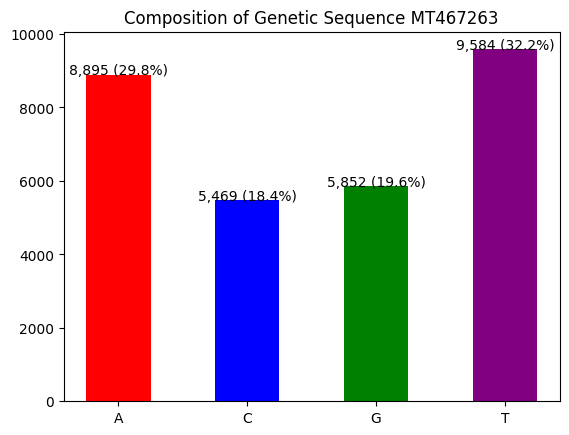

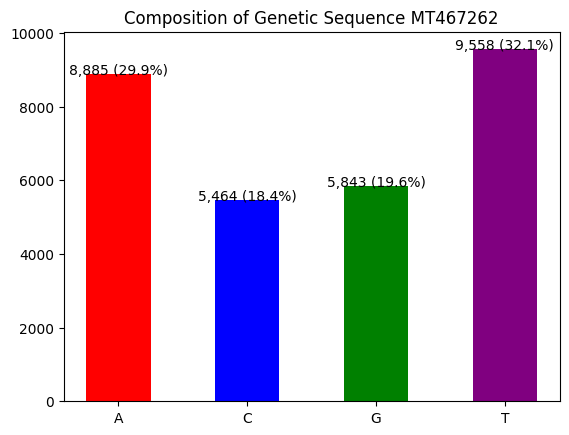

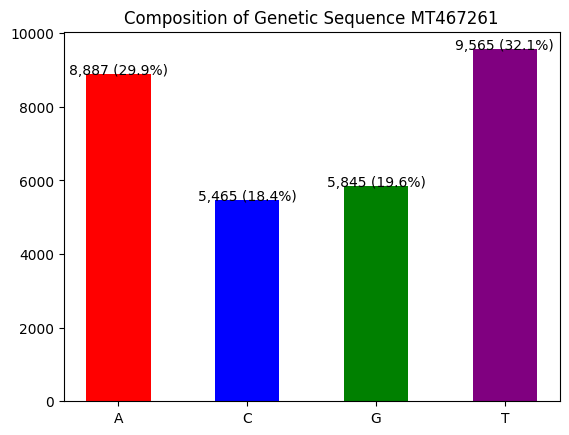

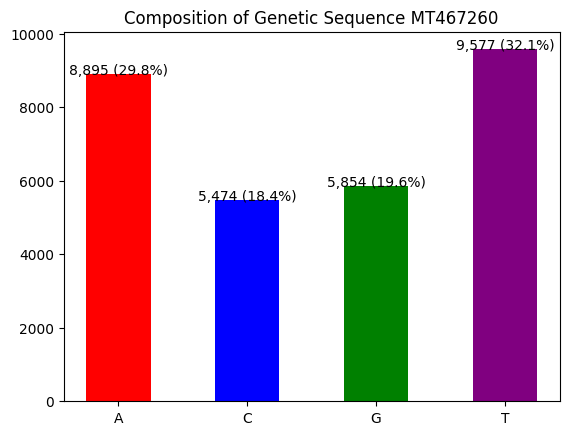

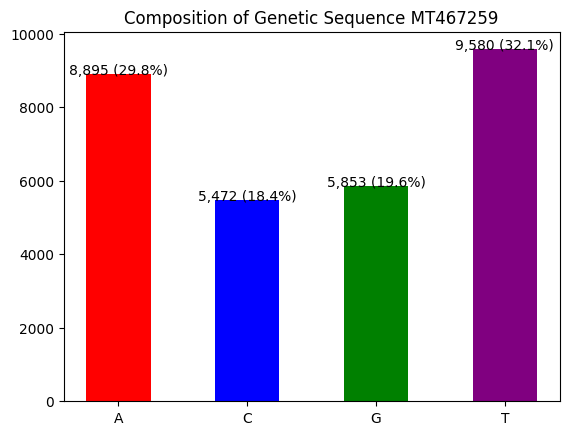

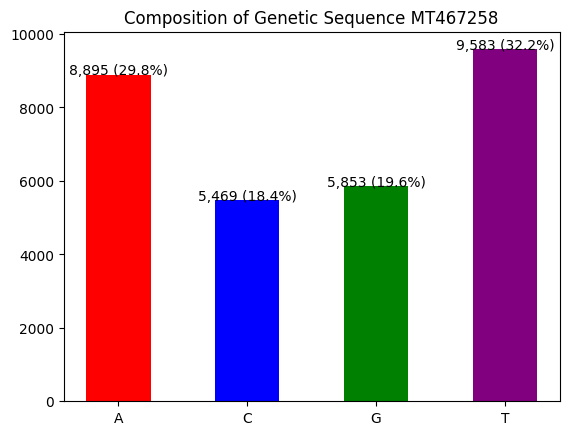

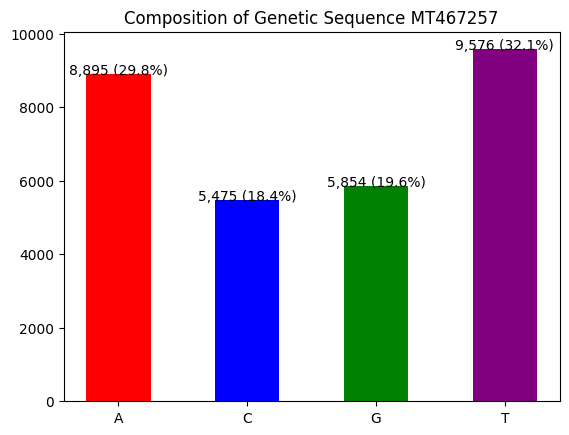

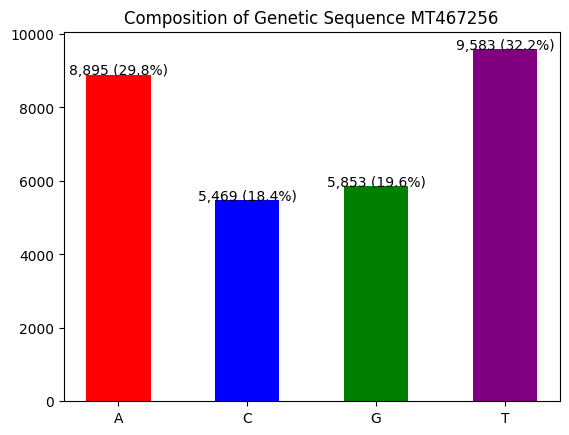

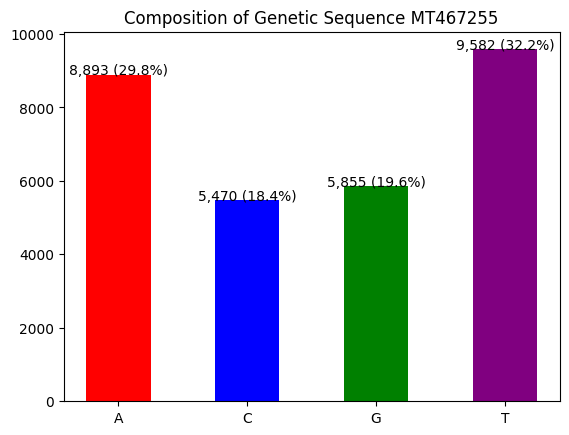

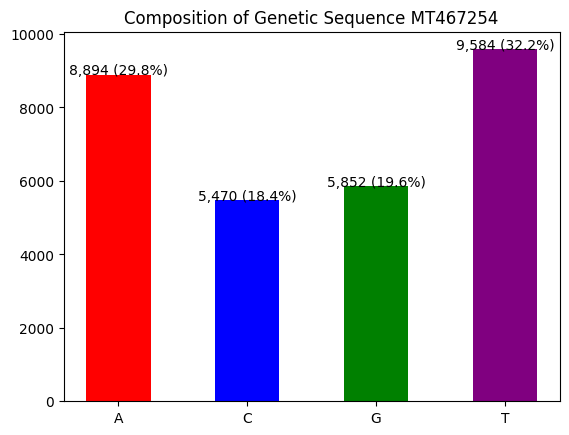

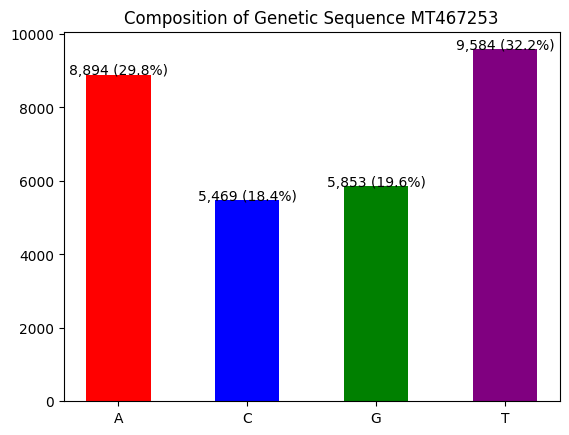

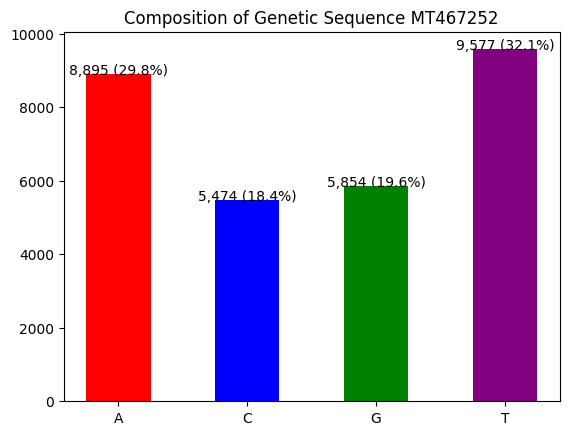

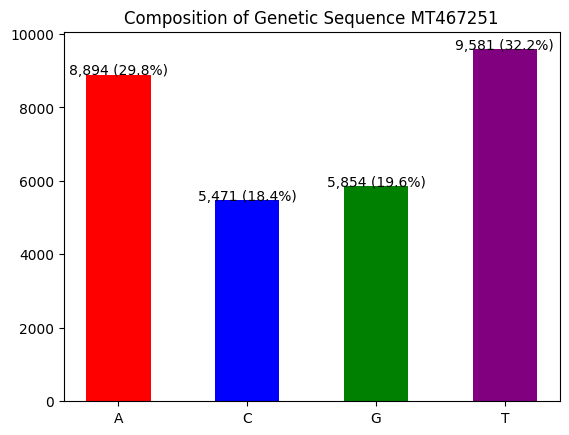

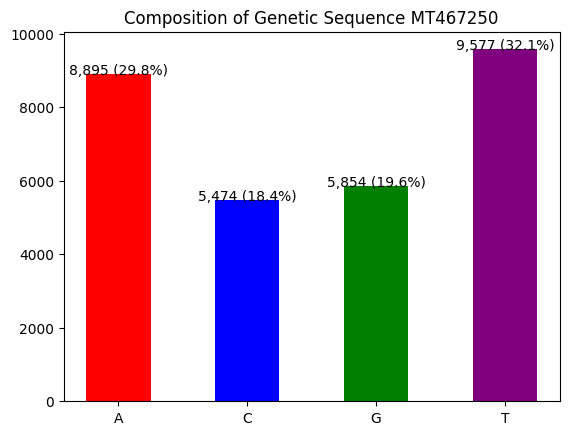

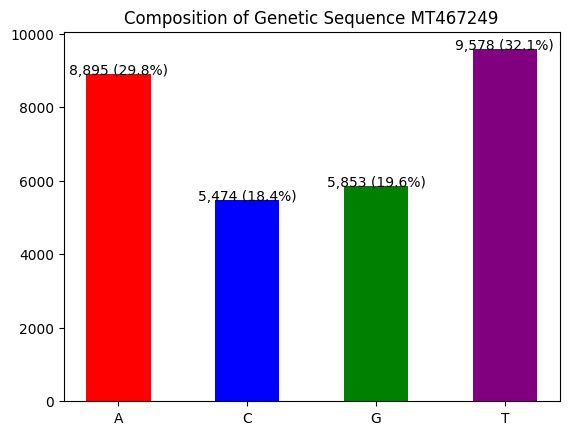

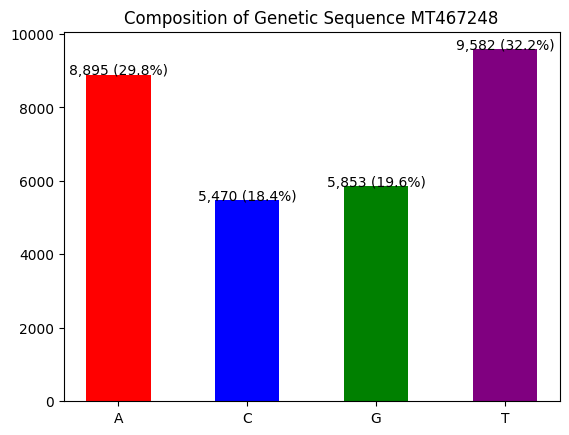

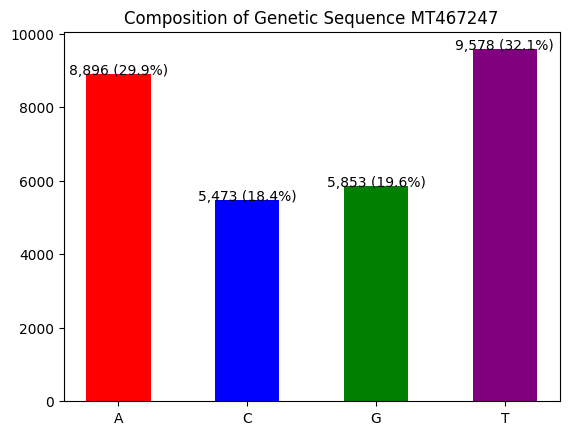

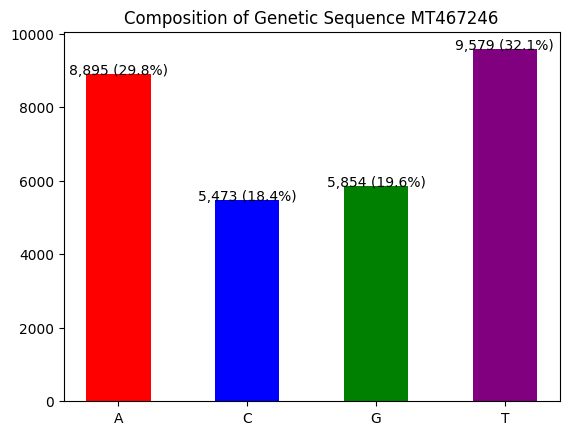

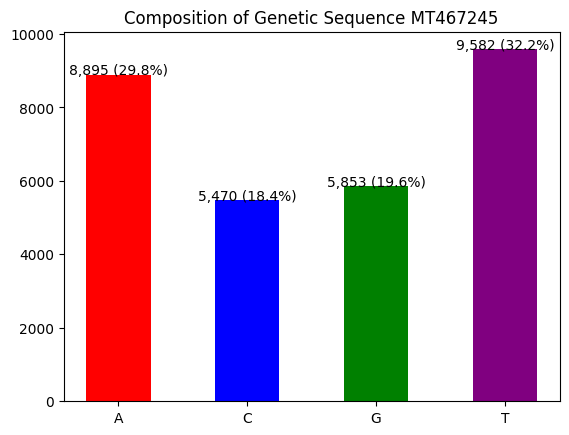

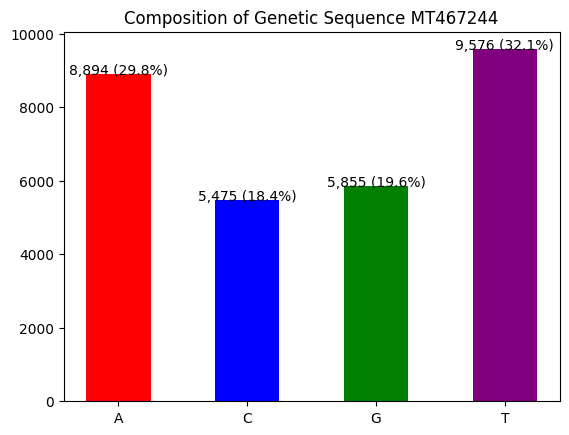

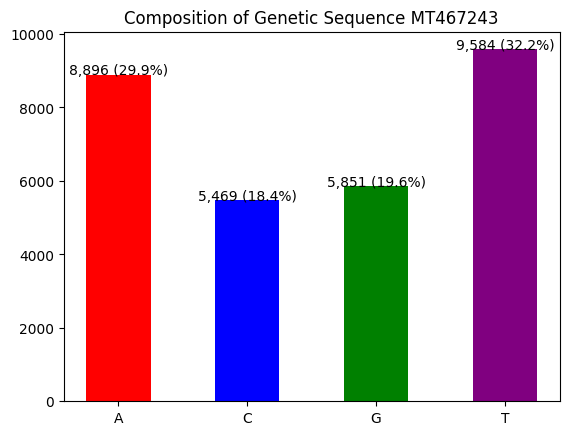

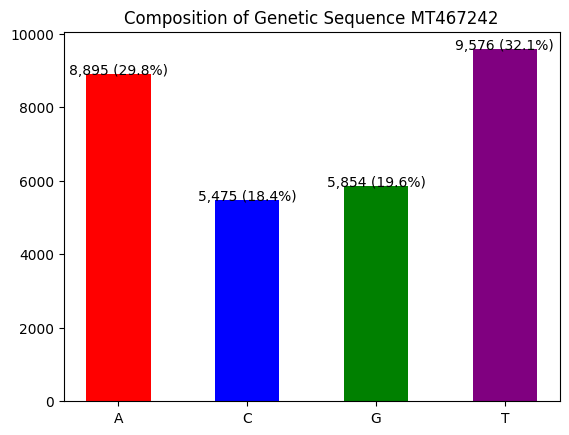

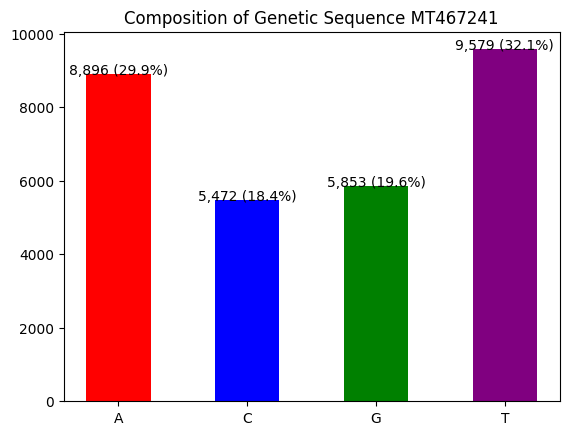

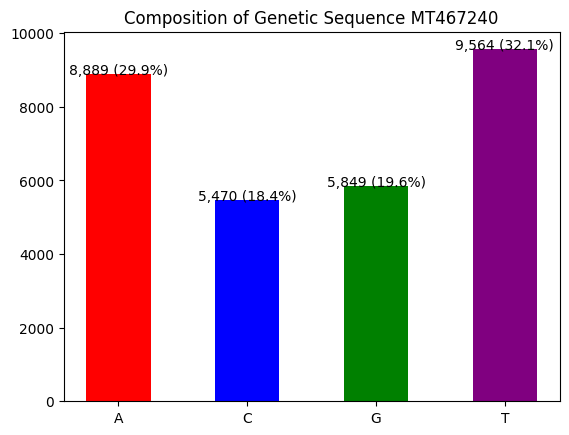

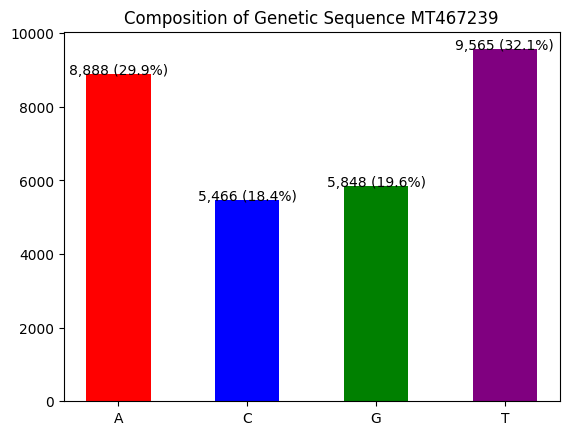

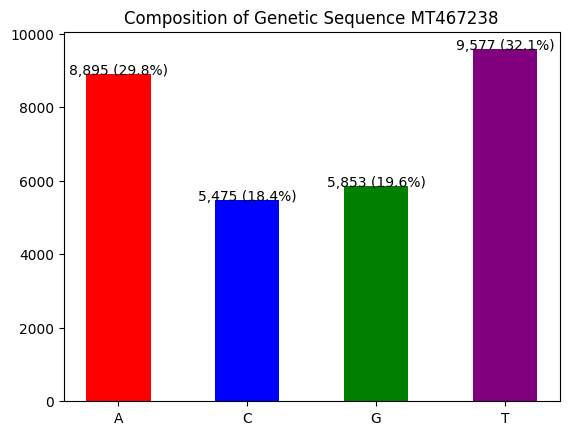

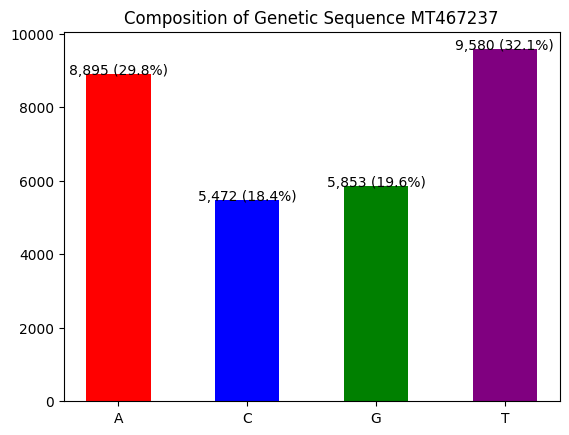

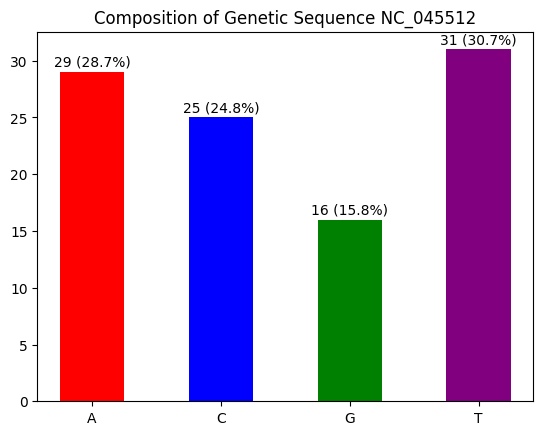

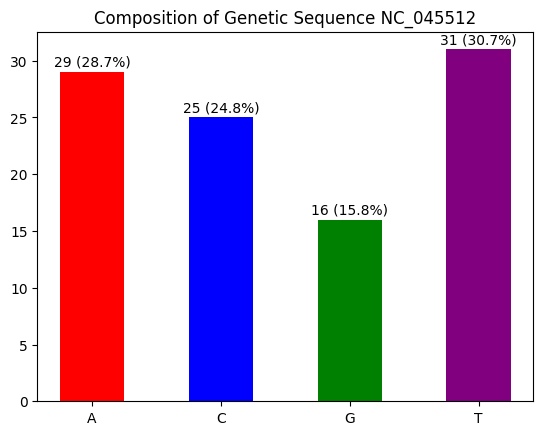

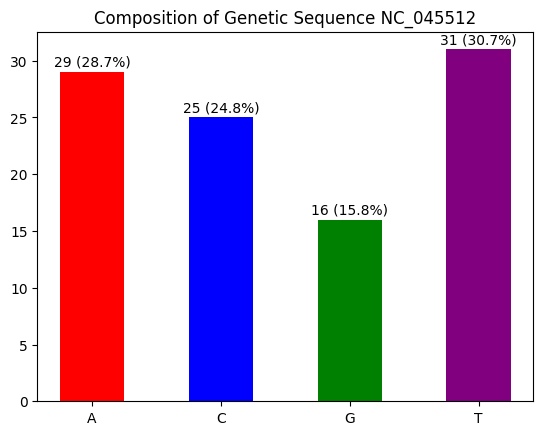

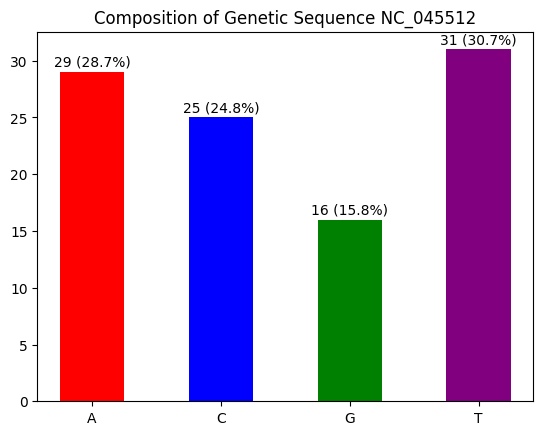

In [7]:
for i in range(len(sequences)):
    accession = accessions[i]
    sequence = sequences[i]
    nucleotide_count = nucleotide_counts(sequence)
    plot_nucleotide_counts(accession, nucleotide_count)

In [8]:

def calculate_nucleotide_frequencies(sequence):
    nucleotide_frequencies = {"A": 0, "C": 0, "G": 0, "T": 0}
    total_nucleotides = 0
    for nucleotide in sequence:
        if nucleotide in nucleotide_frequencies:
            nucleotide_frequencies[nucleotide] += 1
            total_nucleotides += 1
    for nucleotide in nucleotide_frequencies:
        nucleotide_frequencies[nucleotide] /= total_nucleotides
    return nucleotide_frequencies

In [9]:
# Calculate the average nucleotide frequencies across all sequences
average_nucleotide_frequencies = {"A": 0, "C": 0, "G": 0, "T": 0}
total_sequences = len(sequences)
for sequence in sequences:
    nucleotide_frequencies = calculate_nucleotide_frequencies(sequence)
    for nucleotide in nucleotide_frequencies:
        average_nucleotide_frequencies[nucleotide] += nucleotide_frequencies[nucleotide] / total_sequences

In [10]:
print(average_nucleotide_frequencies)

{'A': 0.29703500434700164, 'C': 0.19187175992729757, 'G': 0.19151682068244705, 'T': 0.3195764150432538}


In [11]:
def detect_mutations(sequence, threshold):
    nucleotide_frequencies = calculate_nucleotide_frequencies(sequence)
    for nucleotide in nucleotide_frequencies:
        if abs(nucleotide_frequencies[nucleotide] - average_nucleotide_frequencies[nucleotide]) > threshold:
            return True
    return False

In [12]:
for i in range(len(sequences)):
    accession = accessions[i]
    sequence = sequences[i]
    if detect_mutations(sequence, mutation_threshold):
        print(f"Sequence {accession} contains a mutation")
    else:
        print(f"Sequence {accession} is normal")

Sequence MT467263 is normal
Sequence MT467262 is normal
Sequence MT467261 is normal
Sequence MT467260 is normal
Sequence MT467259 is normal
Sequence MT467258 is normal
Sequence MT467257 is normal
Sequence MT467256 is normal
Sequence MT467255 is normal
Sequence MT467254 is normal
Sequence MT467253 is normal
Sequence MT467252 is normal
Sequence MT467251 is normal
Sequence MT467250 is normal
Sequence MT467249 is normal
Sequence MT467248 is normal
Sequence MT467247 is normal
Sequence MT467246 is normal
Sequence MT467245 is normal
Sequence MT467244 is normal
Sequence MT467243 is normal
Sequence MT467242 is normal
Sequence MT467241 is normal
Sequence MT467240 is normal
Sequence MT467239 is normal
Sequence MT467238 is normal
Sequence MT467237 is normal
Sequence NC_045512 contains a mutation
Sequence NC_045512 contains a mutation
Sequence NC_045512 contains a mutation
Sequence NC_045512 contains a mutation
